# QCTO - Workplace Module

### Insurance Fruad in Africa
#### Done By: Revahn Macauley

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#nine>7. Conclusion and Future Work</a>


---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

Insurance Fruad in Africa

Despite being home to approximately 17% of the global population, Africa's insurance industry remains underrepresented in the global market. In 2017, the continent's total insurance premiums were estimated at $45 billion, a modest figure when compared to other regions. More strikingly, Africa accounted for just over 1% of global insured catastrophe losses, underscoring a significant gap in coverage and resilience.

This disparity highlights several structural challenges: low insurance penetration, limited consumer awareness, regulatory fragmentation, and economic constraints. Many African countries still rely heavily on informal risk-sharing mechanisms, and access to formal insurance products is often limited to urban or wealthier populations

This project seeks to identify critical challenges in the African insurance industry, particularly fruad and the impact it has on the industry. Fraudulent claims increase costs and reduce trust, making fraud detection a high-impact area for data-driven solutions.  Building a reliable model to detect fraudulent insurance claims by using customer, vehicle, and incident-related data will assist in addressing some of these challenge unique to the African insurance industry


---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [28]:
#Packages imported for data loading, data manipulation and data visulisation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsimport
import requests
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.utils import resample
import seaborn as sns

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

The insurance_claims dataset is in .xlsx format and can be accessed through the GitHub repository linked
here https://github.com/Explore-AI/Public-Data/blob/master/insurance_claims_raw.xlsx. 
Below are the descriptions of the key features and descriptions of the insurance dataset:

**Policy_bind_date** - Starting date of the insurance policy.

**Policy_csl Combined Single Limits** - This is the maximum value the insurer will pay out per
incident.

**Policy_annual_premium** - The total dollar amount for the yearly premium.

**Umbrella_limit** - Extra insurance that provides protection beyond existing limits and coverages of
other policies.

**Auto_make** - Vehicle brand.

**Auto_model** - Vehicle model.

**Insured_education_level** - Highest qualification of the insurer.

**Policy_deductable Excess** - payment before a payout or service is conducted.

**Insured_occupation** - The profession in which the insurer works.

**Fraud_reported** - Y - a fraudulent or false claim
N - a legit and valid claim

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [149]:
#Loading dataset.
dataset = pd.read_csv('insurance_claims_raw.csv')

In [150]:
dataset.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,998.000000,1000.000000,998.000000,997.000000,1.000000e+03,1000.000000,998.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,996.000000,999.000000,999.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.962926,546238.648000,1134.268537,1257.001113,1.101000e+06,501214.488000,25176.452906,-26793.700000,11.644000,1.83900,0.992000,1.487000,52767.469880,7434.944945,7398.628629,37928.950000,2005.103000,NaN
std,115.113174,9.135425,257063.005276,611.251914,244.265051,2.297407e+06,71701.610941,27877.379027,28104.096686,6.951373,1.01888,0.820127,1.111335,26405.348039,4883.158265,4827.050887,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1090.320000,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.500000,4290.000000,4440.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.830000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,57935.000000,6780.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.740000,0.000000e+00,603251.000000,51075.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70620.000000,11310.000000,10890.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [151]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          998 non-null    float64
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            998 non-null    float64
 7   policy_annual_premium        997 non-null    float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      999 non-null    object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [152]:
#Identifying columns with missing values
dataset.isna().sum()

months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            93
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [153]:
#Column _c39 dropped as it has no values
dataset.drop('_c39', axis=1, inplace=True)

In [154]:
#Identify duplicate entries
duplicates = dataset[dataset.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported]
Index: []

[0 rows x 39 columns]


In [155]:
#Drop irrelevant columns
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies']

In [156]:
dataset.drop(to_drop, inplace = True, axis = 1)

In [157]:
dataset.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48.0,250/500,1000.0,1406.91,0,MALE,MD,craft-repair,husband,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42.0,250/500,2000.0,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,0,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29.0,100/300,2000.0,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41.0,250/500,2000.0,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44.0,500/1000,1000.0,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


In [158]:
#Filling missing values 
def fill_miss_val(df):
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            # If numeric columns fill NaN with mean
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            # If categorical columns fill NaN with mode
            df[column].fillna(df[column].mode()[0], inplace=True)
    return df

In [159]:
dataset = fill_miss_val(dataset)

C:\Users\f3661687\AppData\Local\Temp\ipykernel_17364\140734823.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\f3661687\AppData\Local\Temp\ipykernel_17364\140734823.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [160]:
dataset.isna().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model                     0
auto_year                      0
fraud_reported                 0
dtype: int

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


<Axes: xlabel='fraud_reported', ylabel='count'>

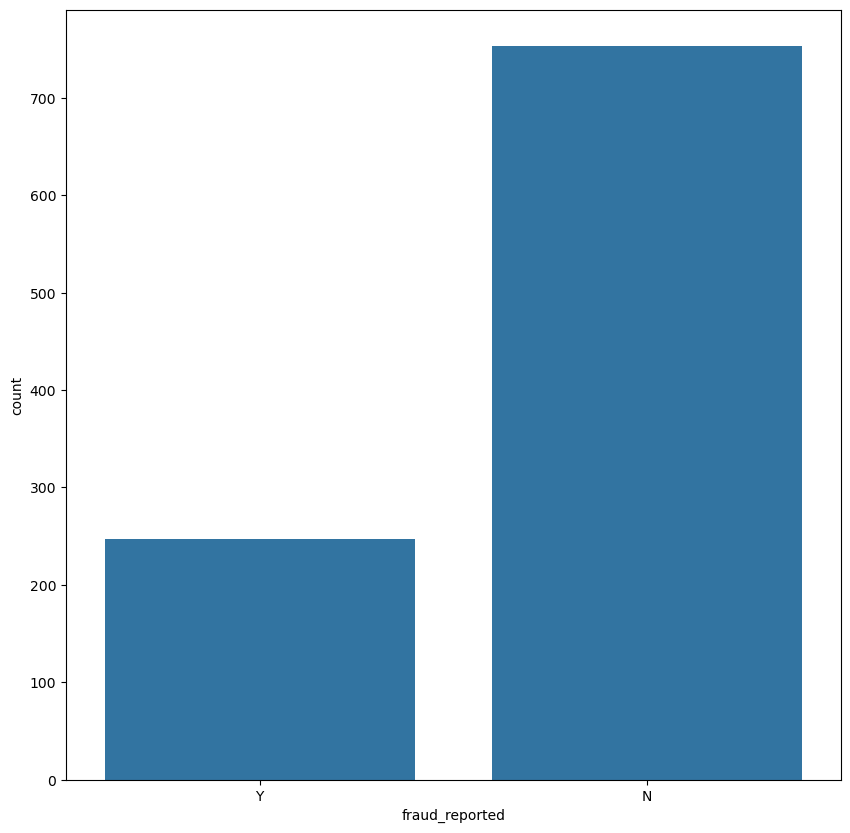

In [161]:
#Plotting the number of claim with fraud reported vs fraud not reported
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='fraud_reported',data=dataset)

Fraudulent claims represent approximately 25% of the dataset

<Axes: xlabel='insured_sex', ylabel='count'>

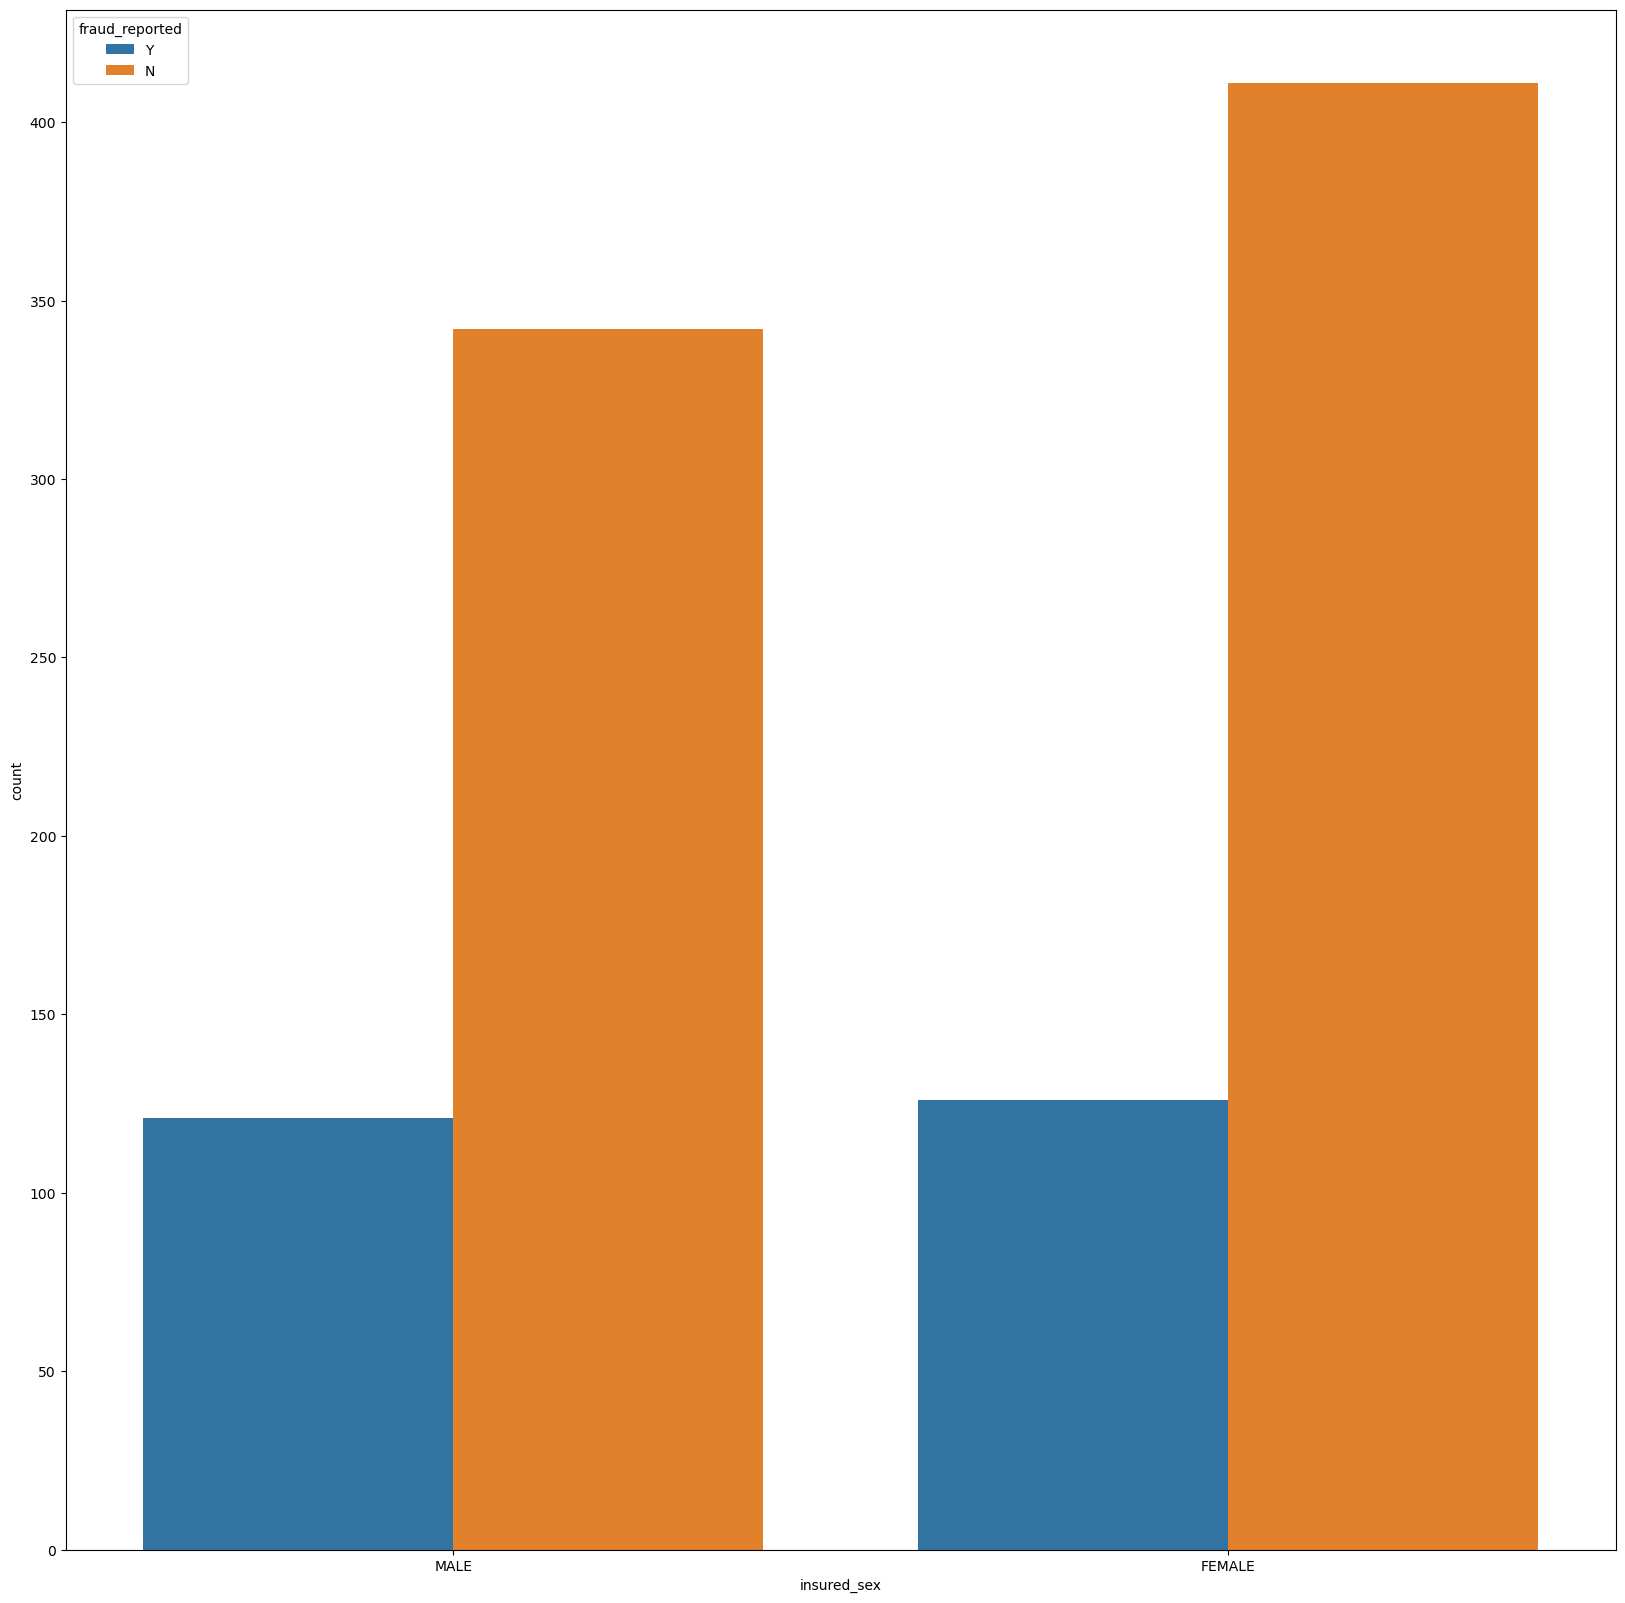

In [99]:
#Plotting insured education level vs fraud reported
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='insured_sex',hue='fraud_reported',data=dataset)

<Axes: xlabel='insured_education_level', ylabel='count'>

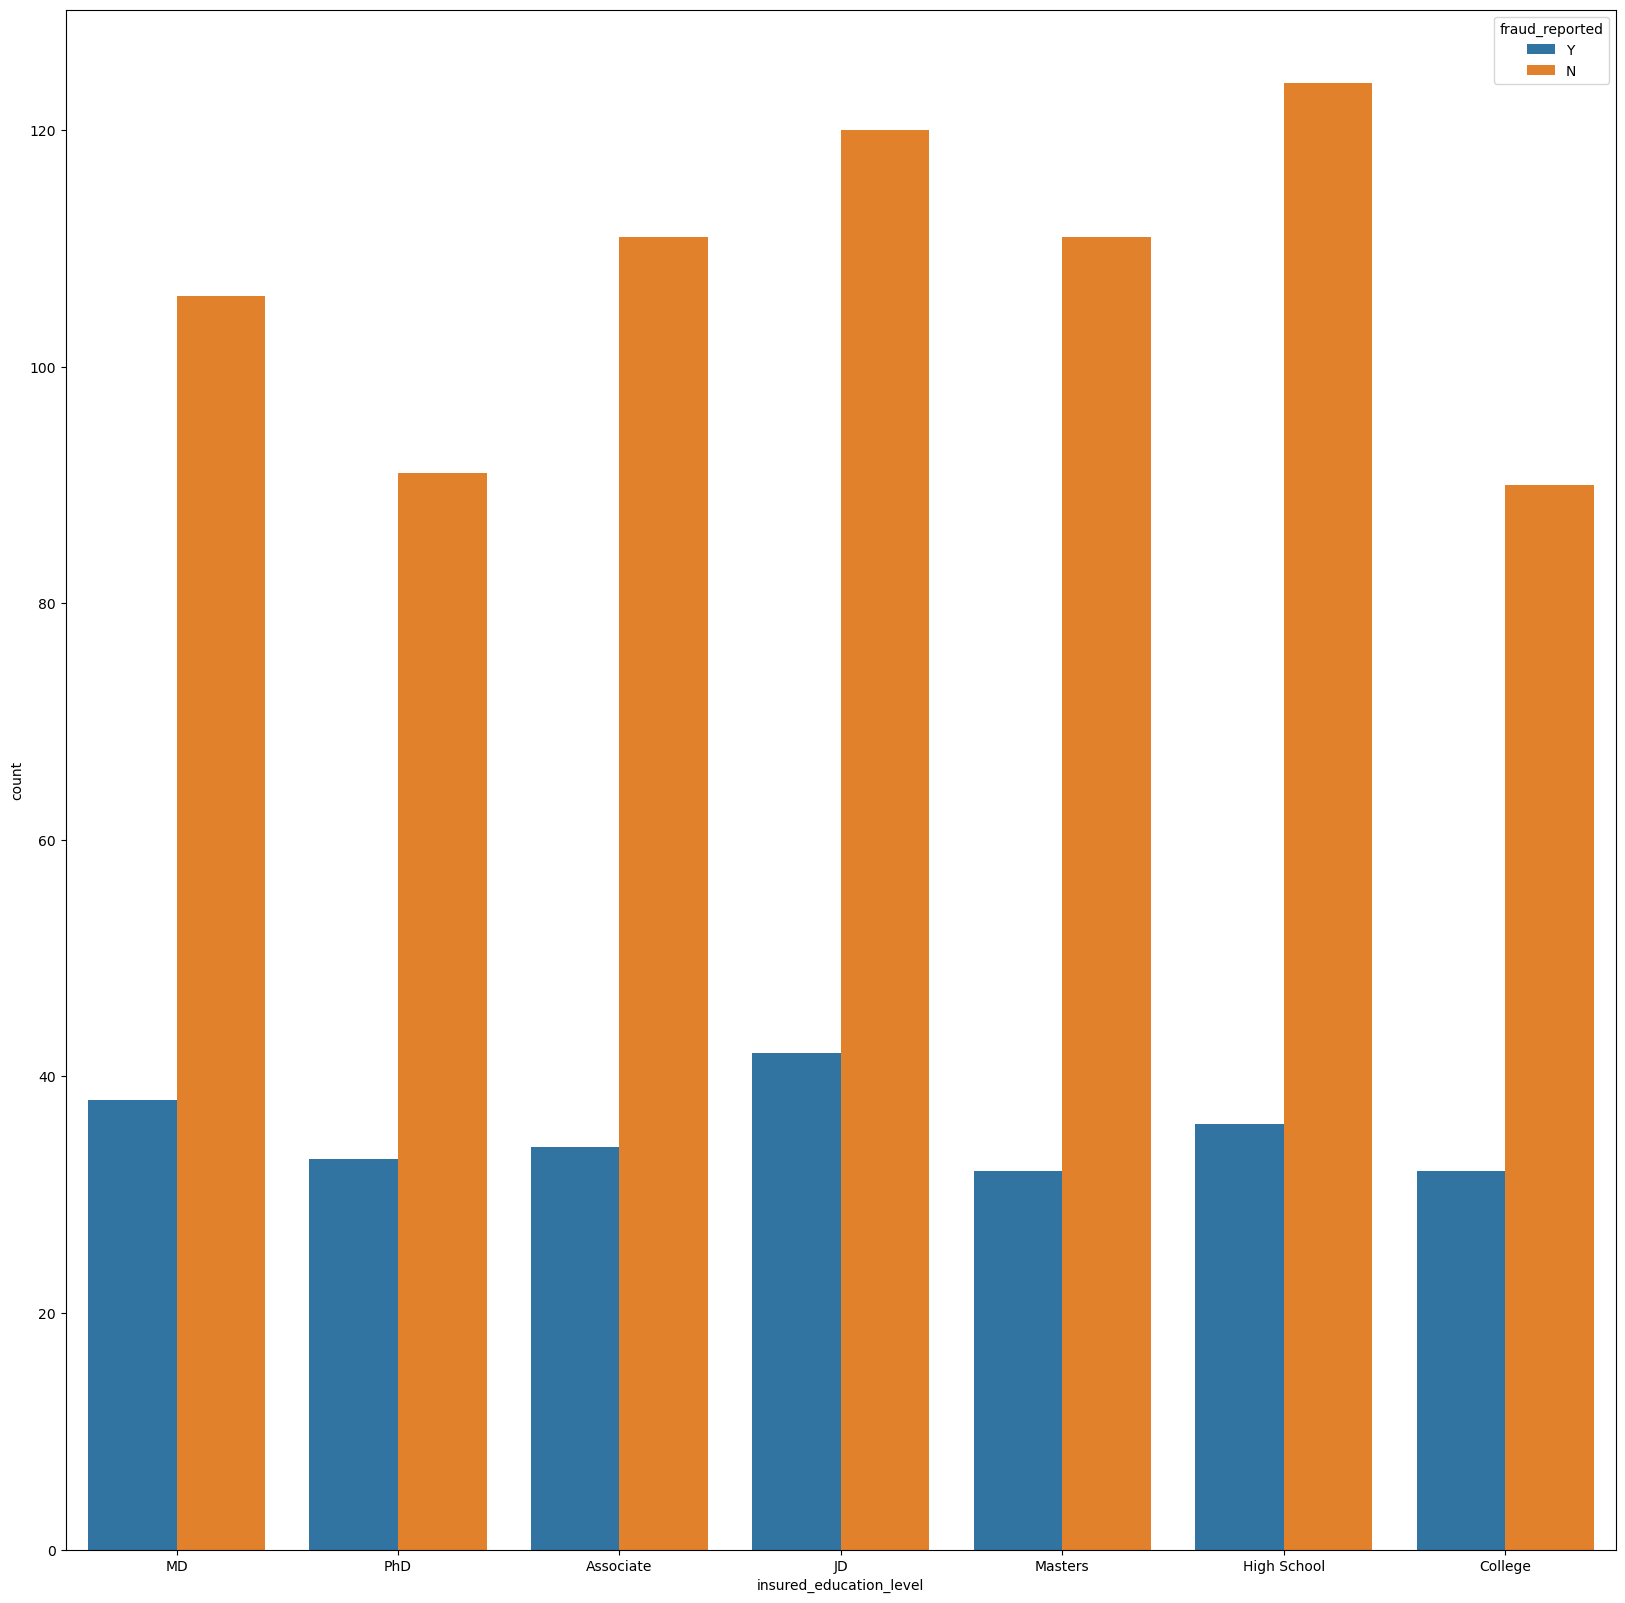

In [163]:
#Plotting insured education level vs fraud reported
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=dataset)

                                Insured_education_level: Some education levels show higher fraud rates

<Axes: xlabel='incident_type', ylabel='count'>

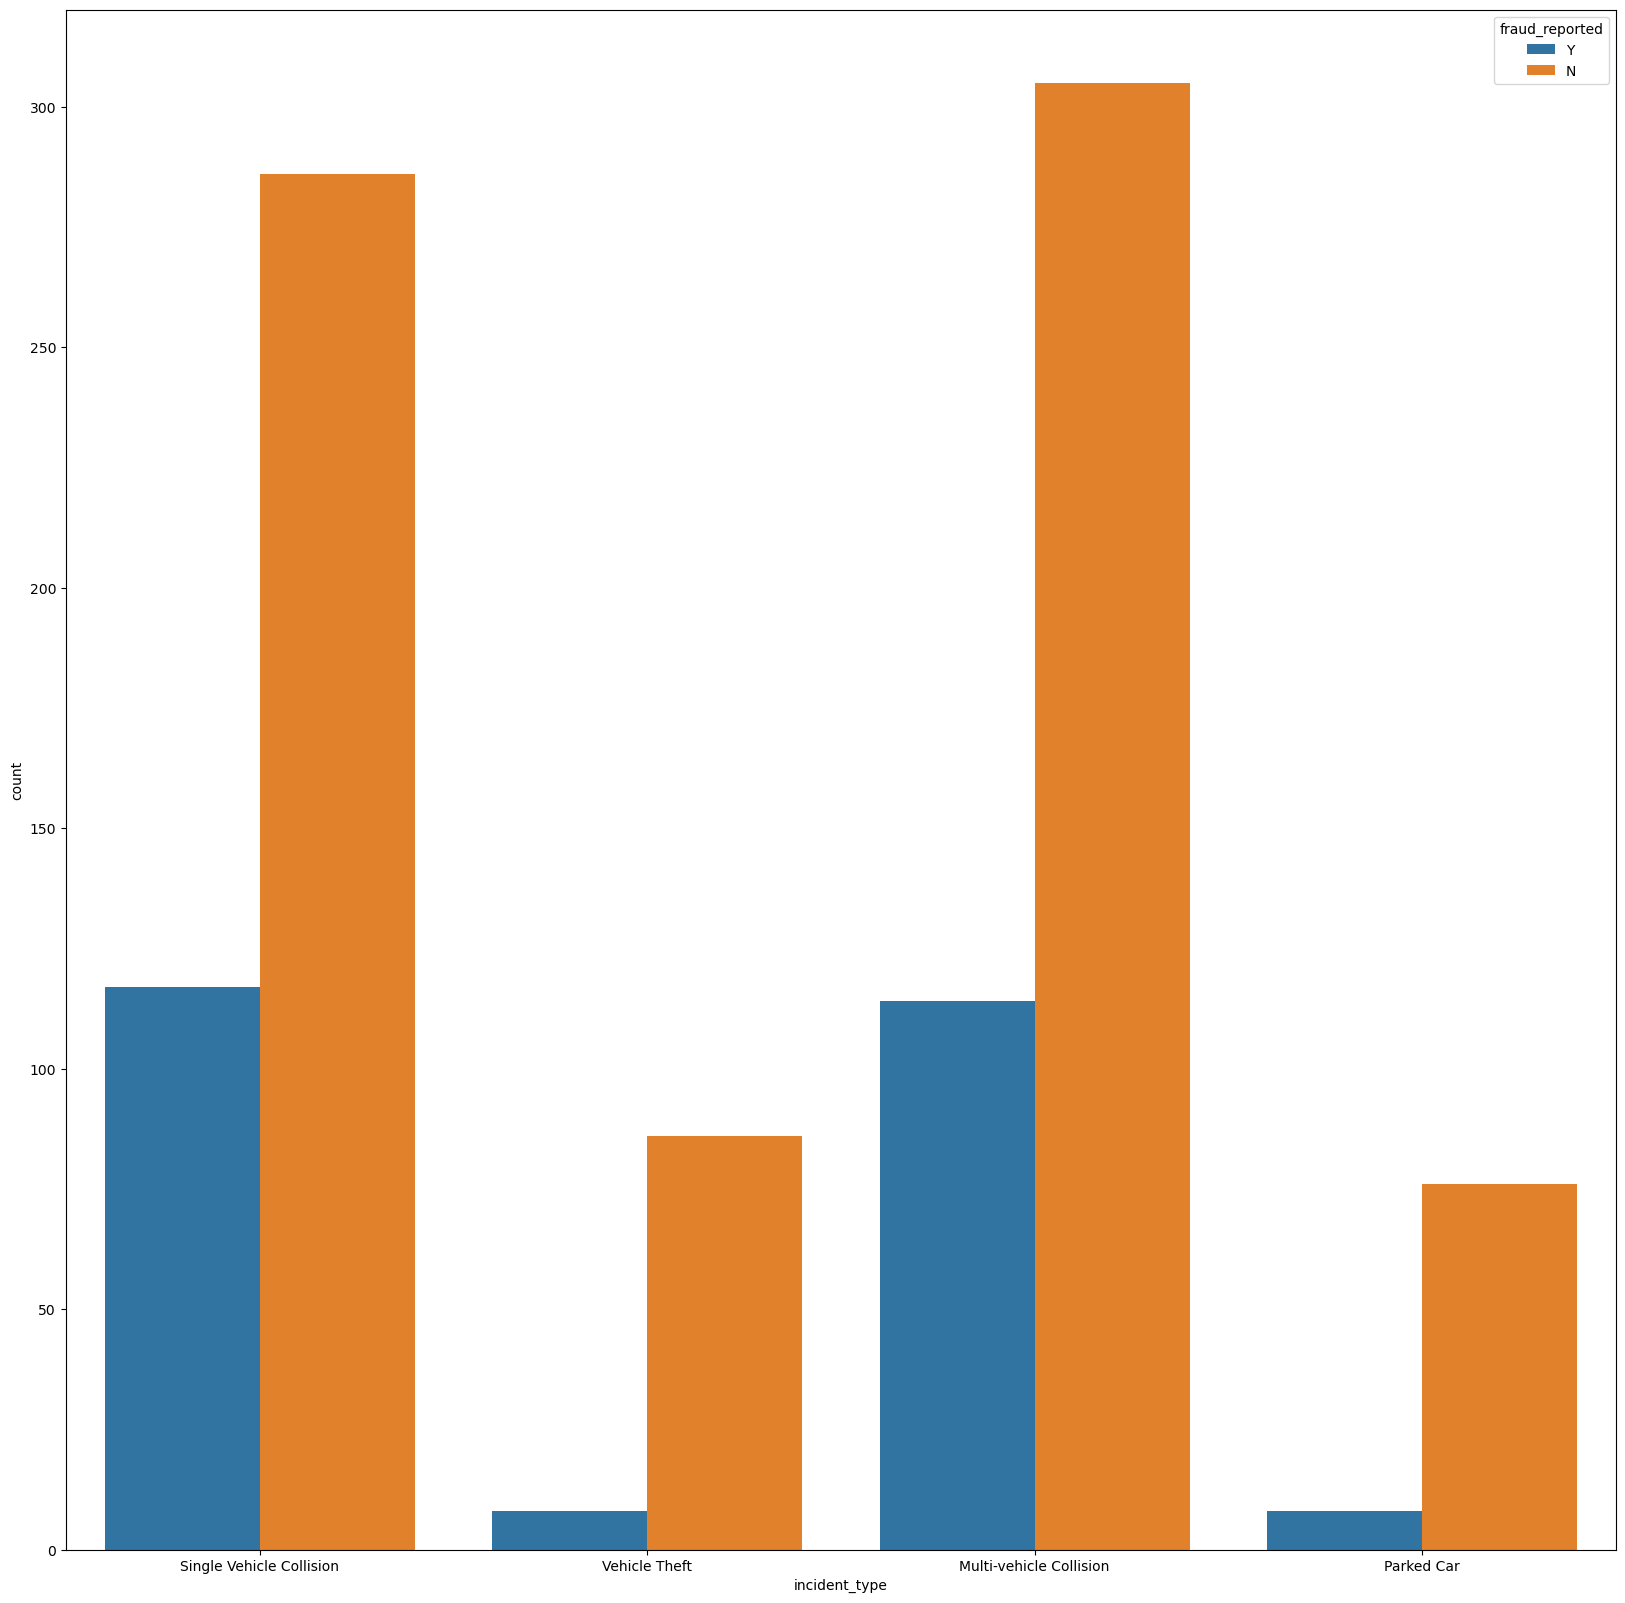

In [164]:
#Plotting incident_type level vs fraud reported
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='incident_type',hue='fraud_reported',data=dataset)

                        Multi-vehicle collisions and single vehicle collisions are more common in fraudulent claims.

<Axes: xlabel='incident_severity', ylabel='count'>

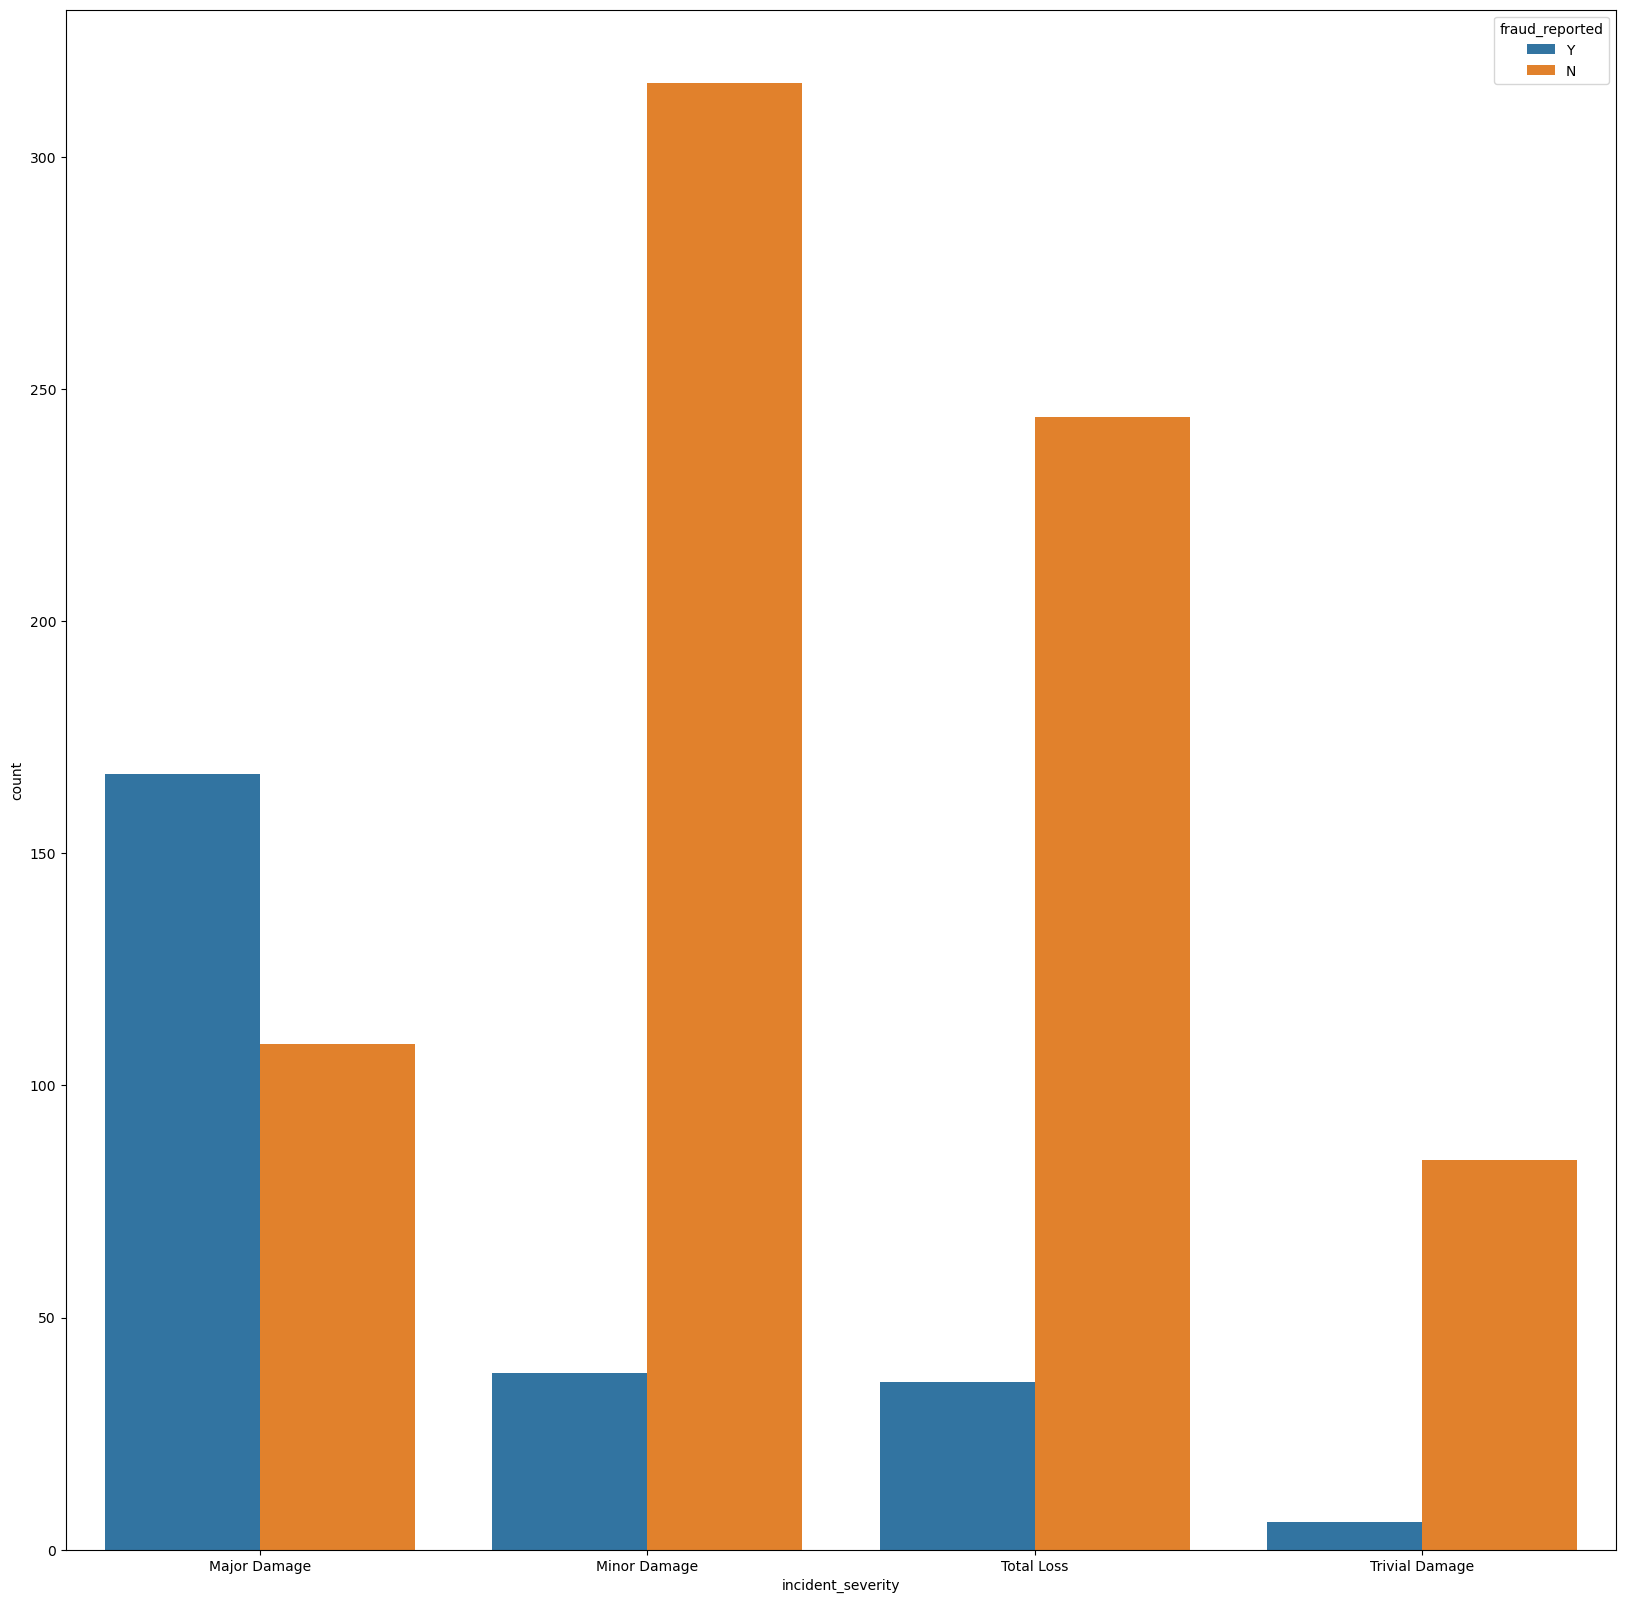

In [165]:
#Plotting incident_severity vs fraud reported
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='incident_severity',hue='fraud_reported',data=dataset)

Faudulent claims are more likely in Major Damage incidents which correlates to Fraud on higher claim amounts

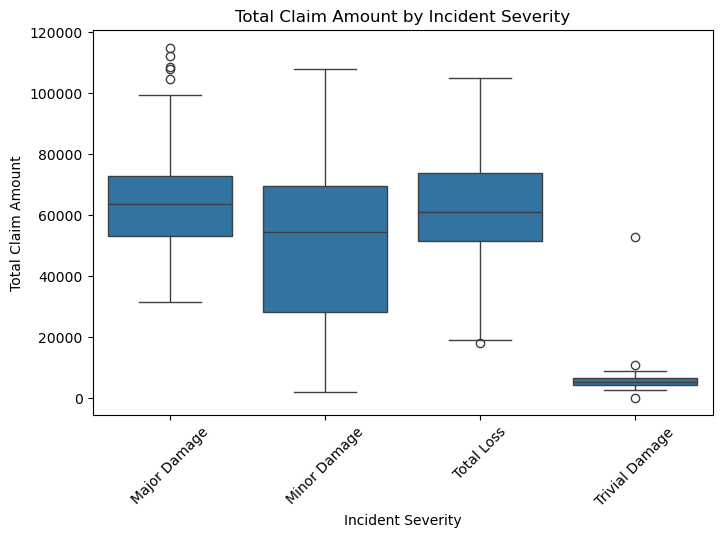

In [166]:

# 3. Boxplot of Total Claim Amount by Incident Severity
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataset, x='incident_severity', y='total_claim_amount')
plt.title('Total Claim Amount by Incident Severity')
plt.xlabel('Incident Severity')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45)
plt.show()


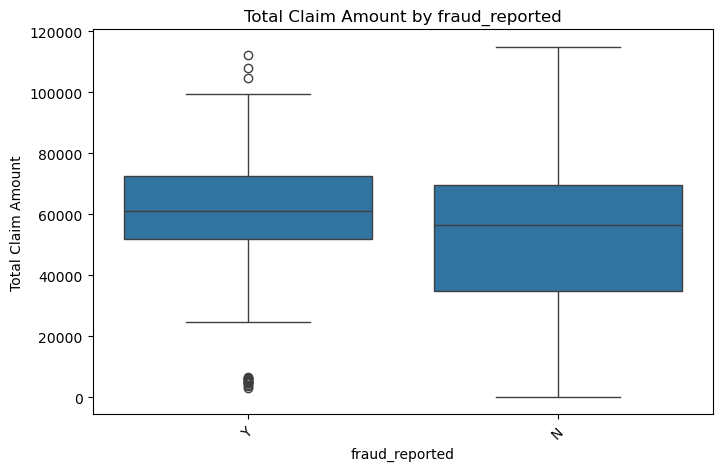

In [167]:
# 3. Boxplot of Total Claim Amount by fraud_reported
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataset, x='fraud_reported', y='total_claim_amount')
plt.title('Total Claim Amount by fraud_reported')
plt.xlabel('fraud_reported')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45)
plt.show()

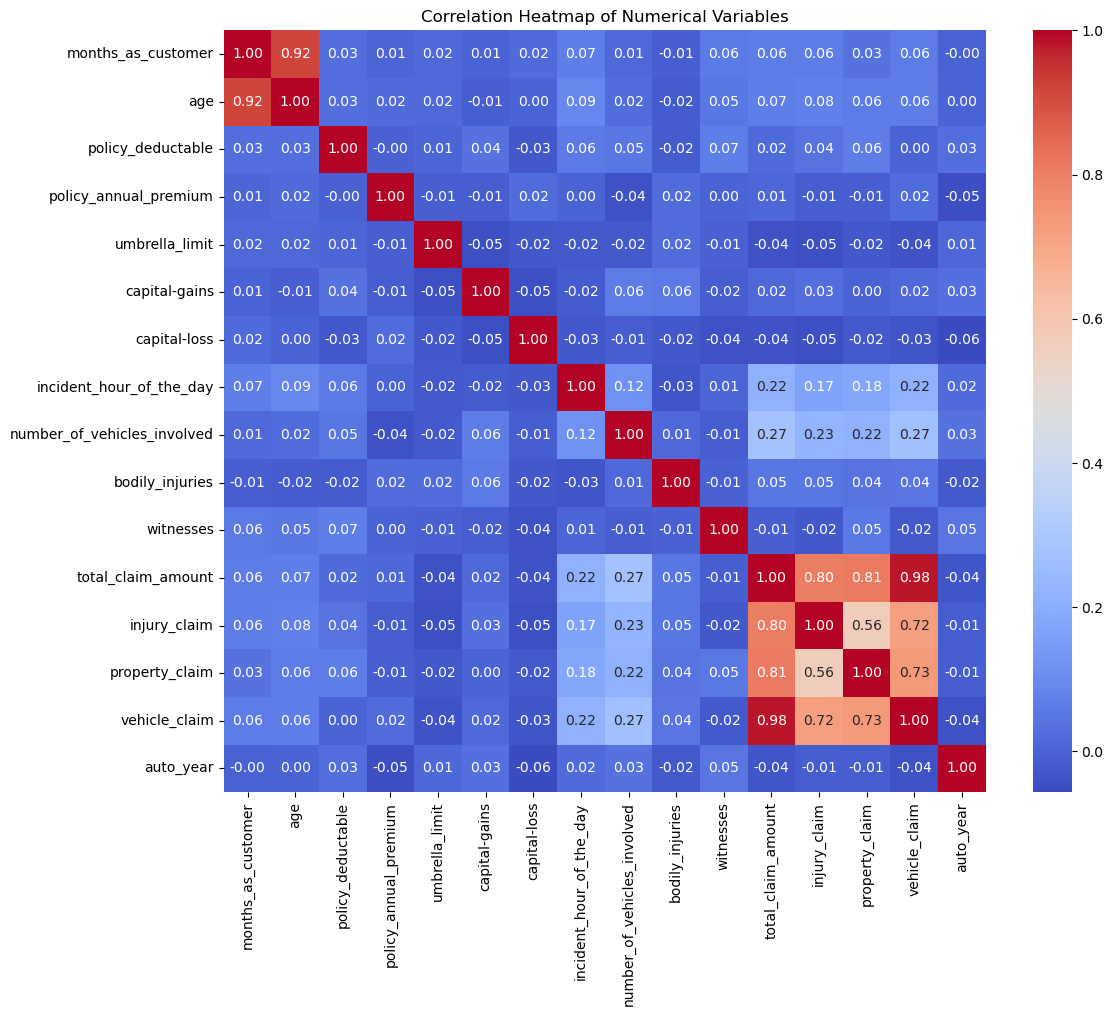

In [168]:
# Select only numerical columns
numerical_df = dataset.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Variables")
plt.tight_layout()
plt.show()



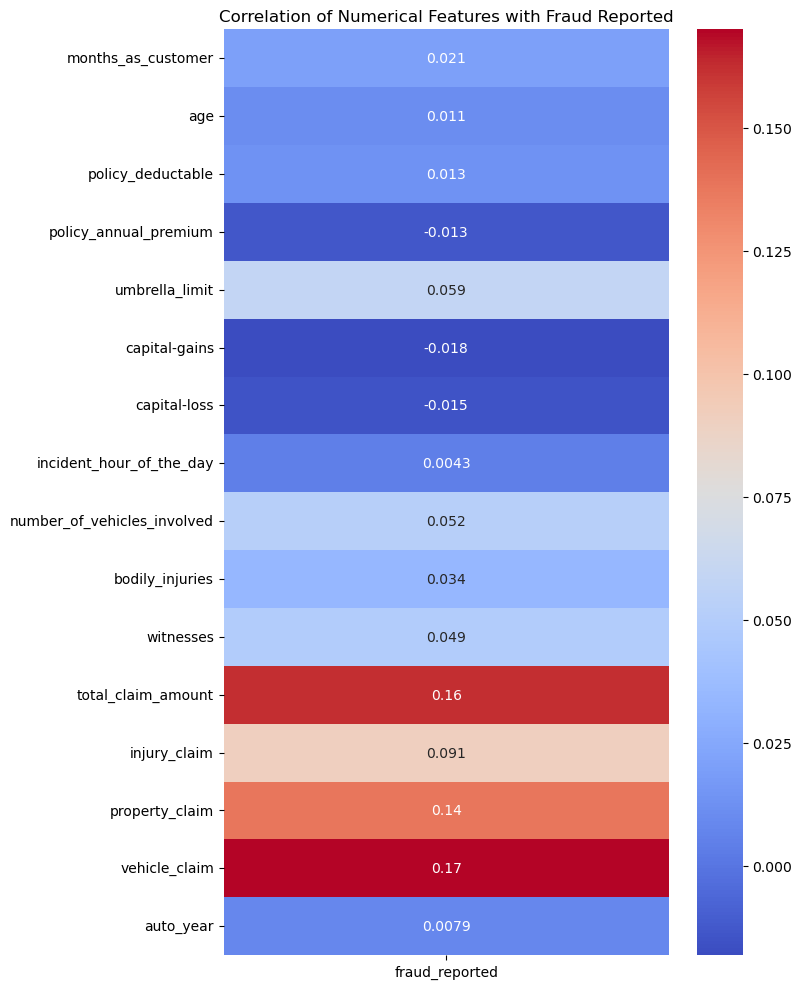

In [169]:

# Convert 'fraud_reported' to binary numeric values
dataset['fraud_reported'] = dataset['fraud_reported'].map({'Y': 1, 'N': 0})

# Select only numeric columns
numeric_cols = dataset.select_dtypes(include='number')

# Compute correlation with fraud_reported
correlation_with_fraud = numeric_cols.corr()['fraud_reported'].drop('fraud_reported')

# Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_fraud.to_frame(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation of Numerical Features with Fraud Reported')
plt.tight_layout()
plt.show()


Highest correlation: vehicle_claim and total_claim_amount show the strongest positive relationship with fraud.
Moderate correlation: property_claim and injury_claim also show some association.
Low correlation: Features like age, months_as_customer, and incident_hour_of_the_day have minimal correlation with fraud.

In [170]:
# Identify numeric columns
numeric_columns = dataset.select_dtypes(include=['number']).columns
numeric_dataset=dataset[numeric_columns]
numeric_columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [171]:
def draw_distribution_plots(df):
    plt.figure(figsize=(30,20))
    for i,col in enumerate(numeric_columns,1):
        plt.subplot(6,5,i)
        sns.histplot(df[col],kde =True)
        f= plt.gca()
        f.set_title(numeric_columns.values[i-1])
    
    plt.xticks(rotation=45)

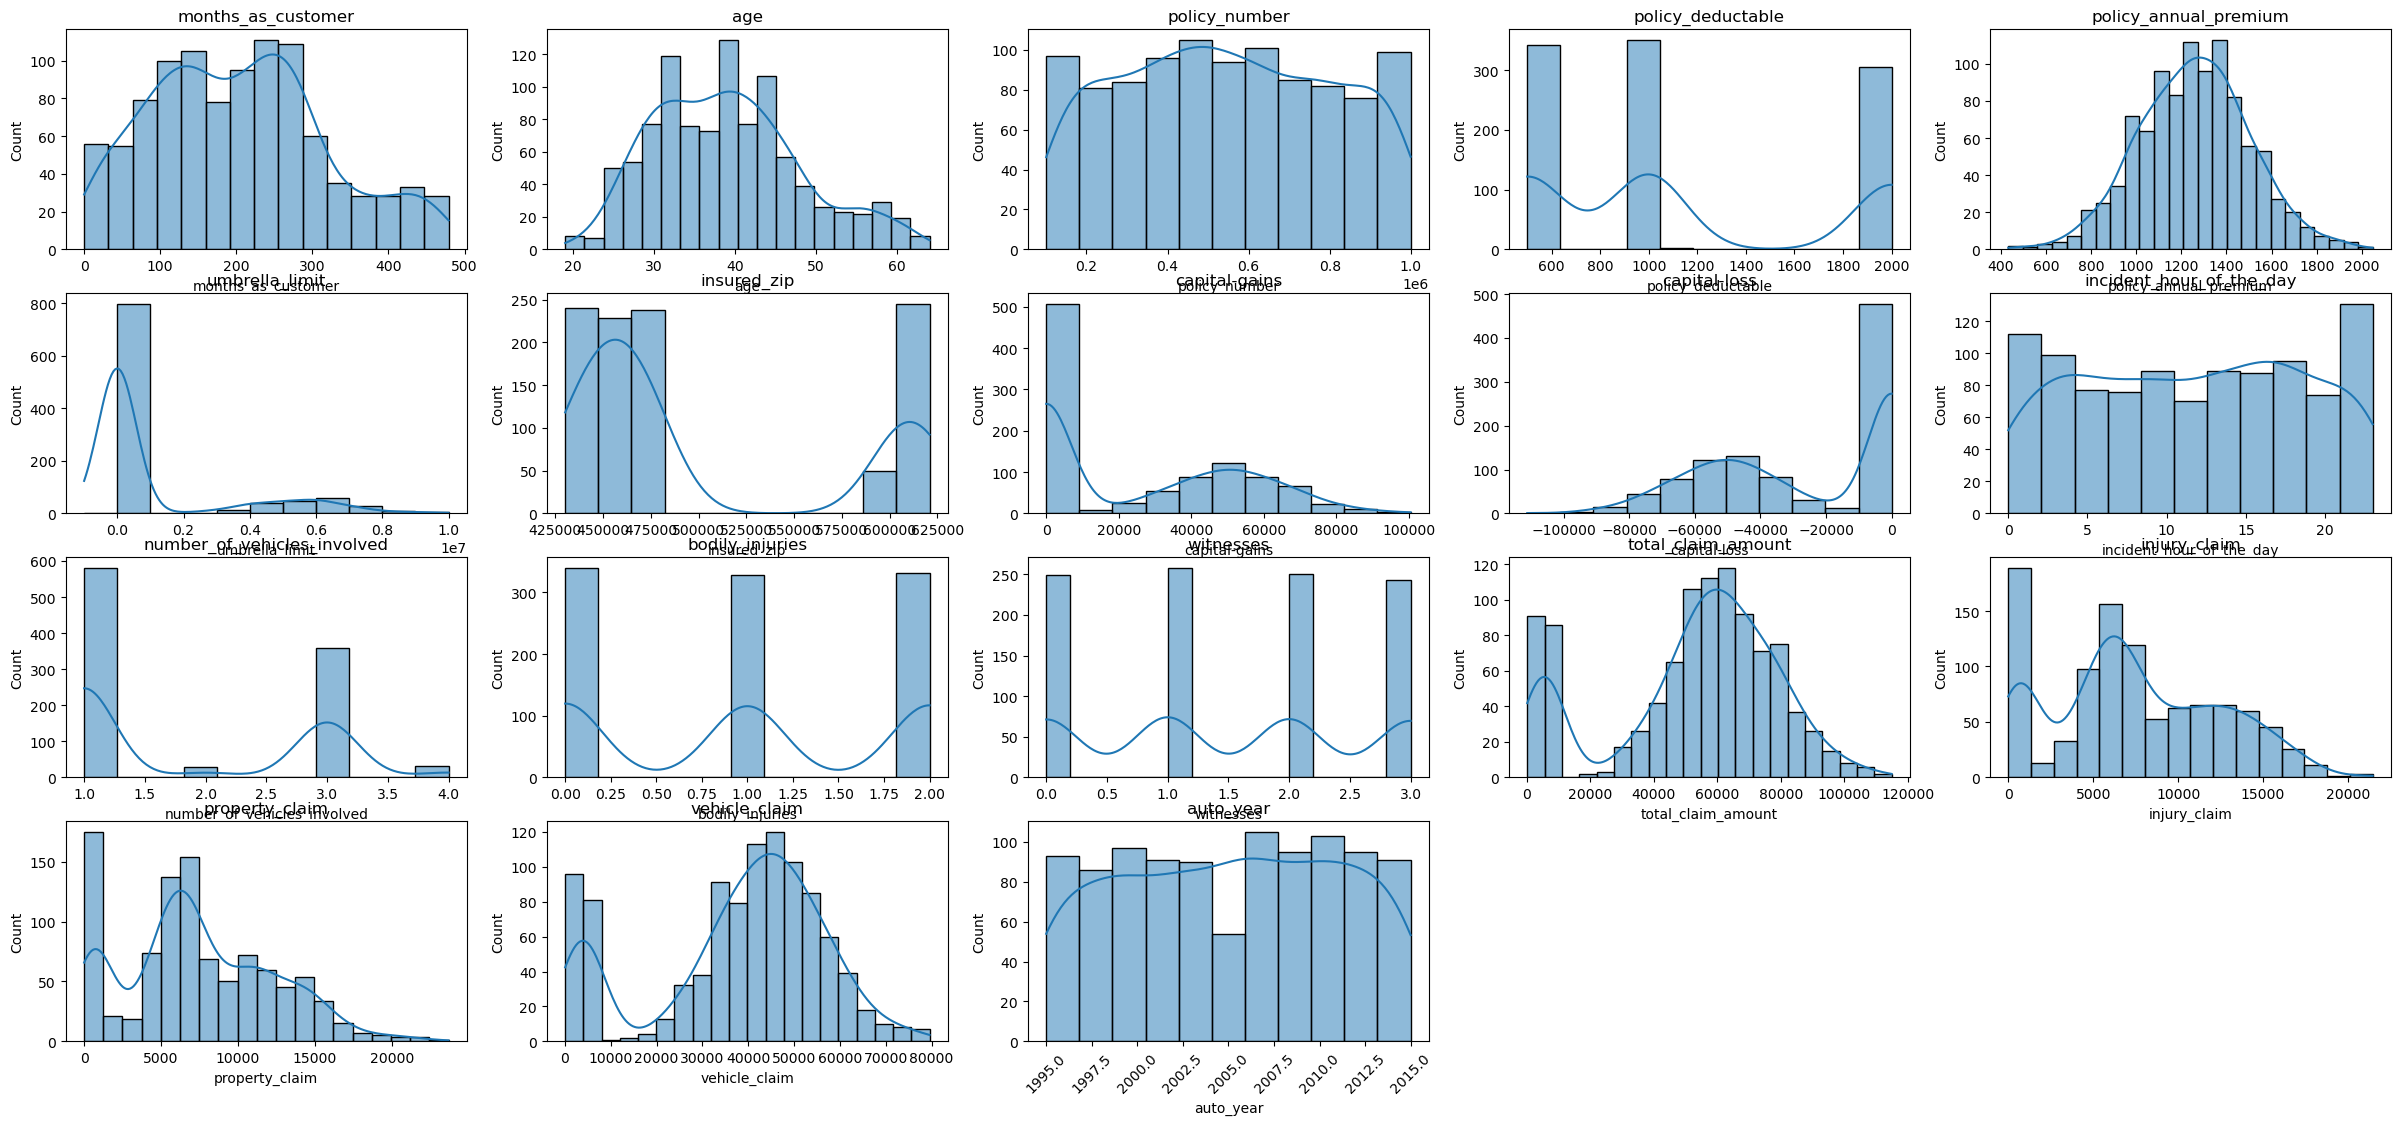

In [113]:
draw_distribution_plots(numeric_dataset)

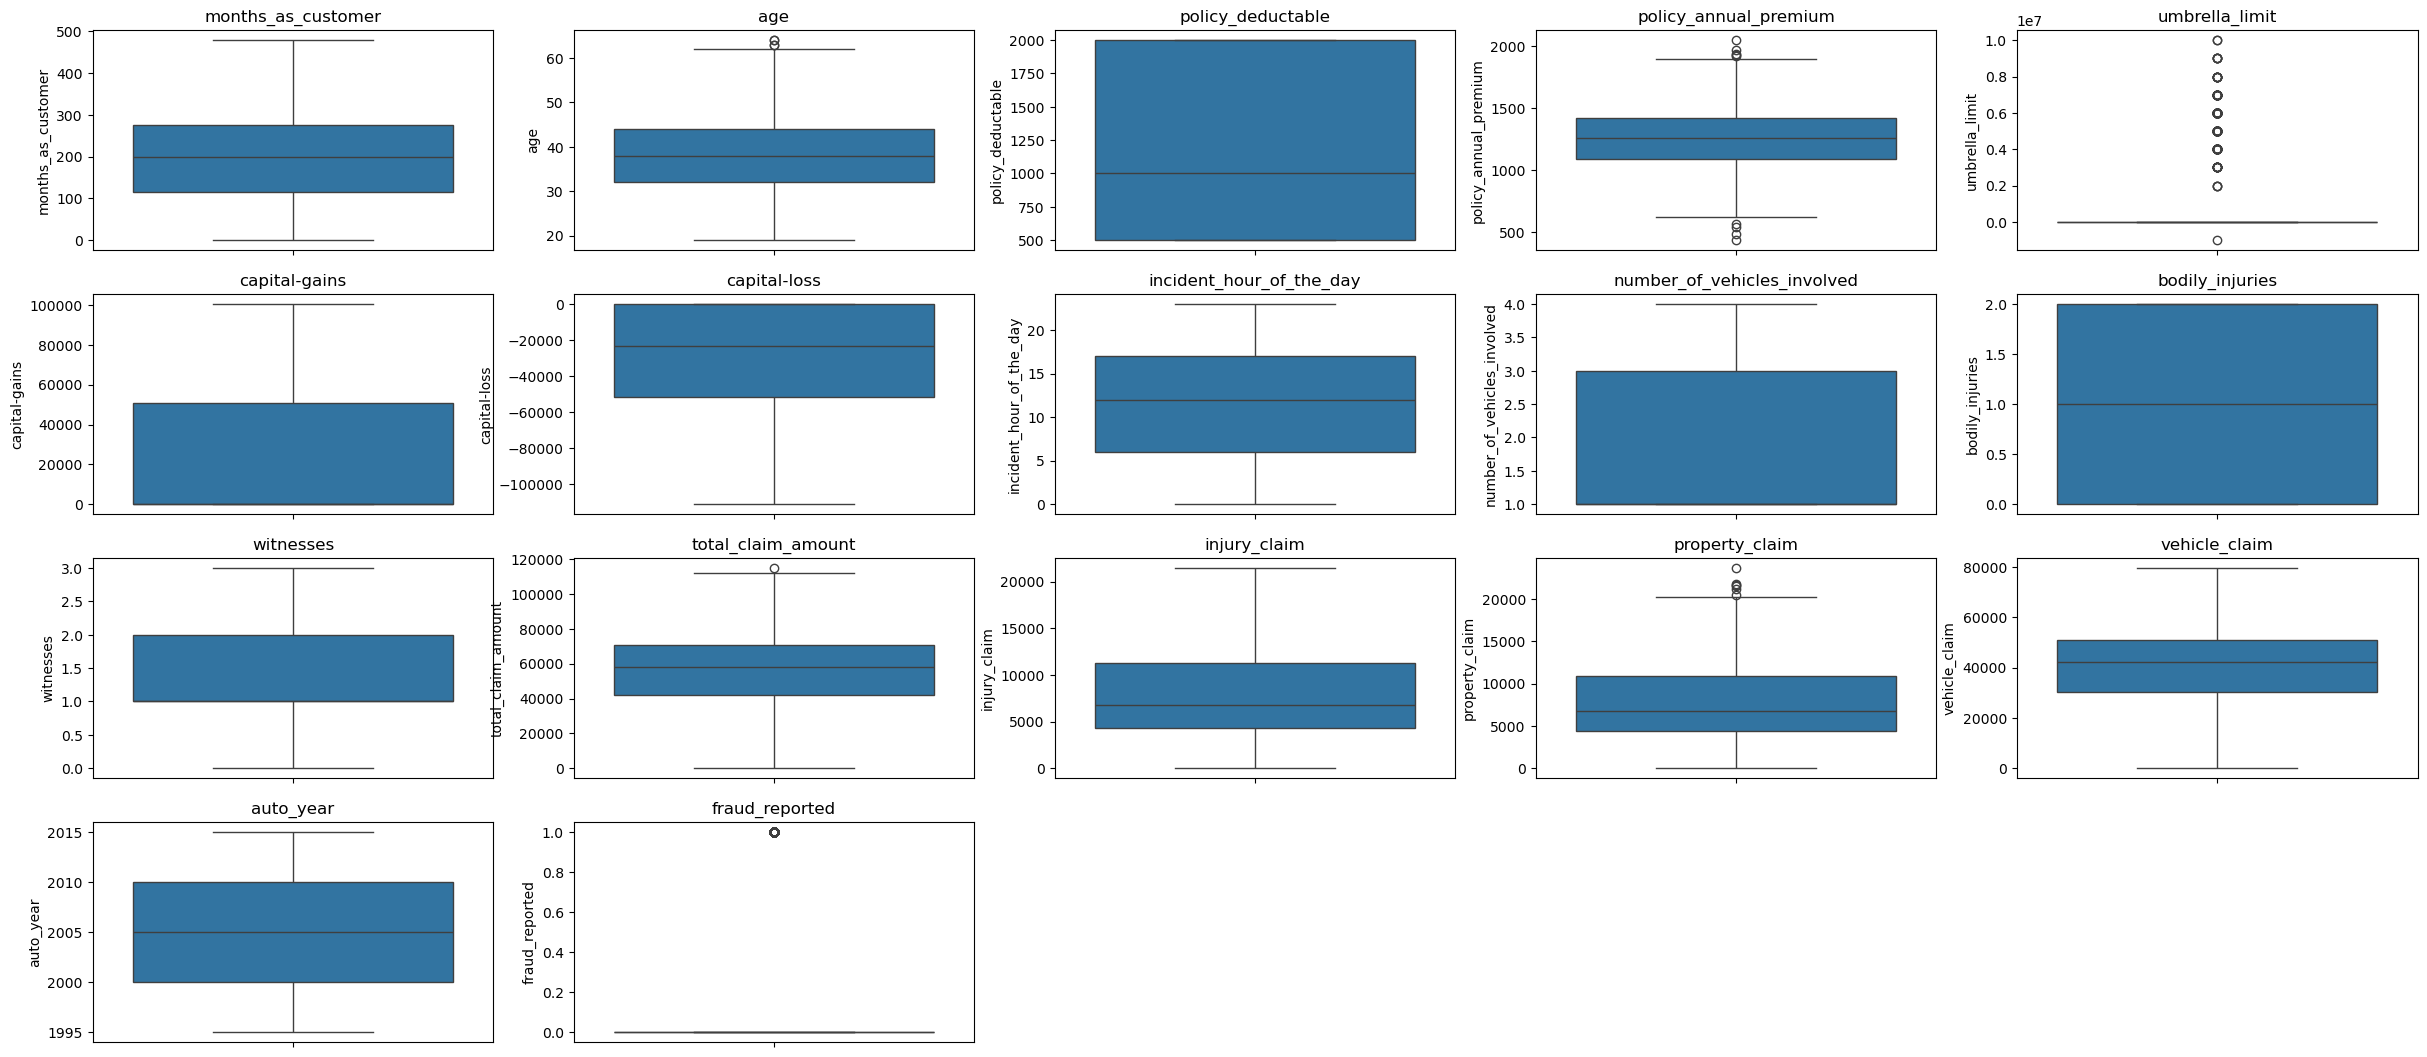

In [172]:
#Plotting the box plots
plt.figure(figsize=(30,20))
for i,col in enumerate(numeric_columns,1):
    plt.subplot(6,5,i)
    sns.boxplot(dataset[col])
    f= plt.gca()
    f.set_title(numeric_columns.values[i-1])
    
    plt.xticks(rotation=45)

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [179]:
# Drop irrelevant or empty columns
dataset.drop(columns=['_c39', 'policy_number', 'incident_location', 'incident_date'], inplace=True, errors='ignore')

# Handle missing values
dataset.dropna(subset=['fraud_reported'], inplace=True)
dataset.fillna(dataset.median(numeric_only=True), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in dataset.select_dtypes(include='object').columns:
    if col != 'fraud_reported':
        le = LabelEncoder()
        dataset[col] = le.fit_transform(dataset[col].astype(str))
        label_encoders[col] = le


In [180]:
# Define features and target
X = dataset.drop(columns=['fraud_reported'])
y = dataset['fraud_reported']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [196]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [202]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]


C:\Users\f3661687\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [201]:
# Evaluate models
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\nEvaluation Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")
evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")




Evaluation Metrics for Random Forest:
Accuracy: 0.73
ROC-AUC: 0.7443260188087775
Confusion Matrix:
 [[130  15]
 [ 39  16]]

Evaluation Metrics for Logistic Regression:
Accuracy: 0.725
ROC-AUC: 0.5587460815047022
Confusion Matrix:
 [[145   0]
 [ 55   0]]


Modelling attempted but could not complete due to time contraints

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


**Conclusion**

Fraudulent claims represent approximately 25% of the dataset, indicating a class imbalance that must be addressed in modeling.
Feature Patterns

Fraudulent claims tend to have higher total claim amounts and are more likely in Major Damage incidents .

Certain incident types e.g., multi-vehicle collisions and single vehicle collisions are more frequently associated with fraud.

Age, insured sex and occupation show subtle differences but are not strong standalone indicators.

Modeling Outcomes

Modeling was attempted however incomplete due to code challenges and time constraints

Random Forest trained was trained and achieved moderate accuracy (~72–73%), but struggled with recall.

Logistic Regression failed.




**Future Work**

Correct and complete Moddeling 

Evaluate and validate the effectiveness and accuracy of the models.

Present the best-performing model and discuss configuration and performance

Apply class balancing techniques (e.g., SMOTE, class weights).

Incorporate categorical features with proper encoding.

Explore advanced models like XGBoost or ensemble methods.

Use precision-recall curves and F1-score for better fraud detection evaluation
